In [ ]:
def diff_scheme(u, lambd):
    return ( u[2] - u[1] )*(k0 + k1*(u[1]**2 + u[2]**2)/2) - \
                (u[1] - u[0])*(k0 + k1*( u[1]**2 + u[0]**2 )/2) + h**2 * lambd * u[1]

    
def board_cond(u, N):
    return u[int(N/2) + 1] - u[int(N/2) -1] - 2*h


def right_part(x, u):
    
    N = len(u) - 1
            
    F_1 = diff_scheme([0, u[0], u[1]], u[-1])
    F_k = [ diff_scheme(u[i-1:i+2], u[-1]) for i in range(1, N - 1) ]
    F_N = diff_scheme([u[N-2], u[N-1], 0], u[-1])
    
    F = np.append( F_1, F_k )
    F = np.append( F, F_N )
    F = np.append( F, board_cond(u, N))
    
    return F

In [17]:
import numpy as np
from numpy import exp

def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

def mult(a, b):
    res = np.matrix(np.zeros(a.shape), dtype = np.float64)
    for i in range(a.shape[0]):
        res[i] = a[i]*b[i]
    return res

def NewtonSolver(f, u0, eps=10**-12, h = 10**-5):
    global N, x
    u = u0
    dx = np.matrix(np.ones(u0.shape), dtype = np.float64)
    i = 0
    fu = np.zeros( (u0.shape[0], u0.shape[0]), dtype = np.float64)
    while (sum(mult(dx,dx)).item(0))**1/2 > eps:
        print("Iteration:", i)
        i+=1
        du = np.matrix(np.zeros(u0.shape), dtype = np.float64)
        for j in range( u0.shape[0]):
            du[j-1] = 0.0
            du[j] = h
            val = ( f(u+du) - f(u-du) )/(2.0*h)
            for k in range( u0.shape[0]):
                fu[j][k]= val[k]
        fu = fu.T
        #matprint(fu)
        dx = -1 * np.linalg.inv(fu) * f(u)
        u = u + dx
        print('||dx||:',(sum(mult(dx,dx)).item(0))**1/2)
    return u

global N, k0, k1, u0v, uNv, x
N = 8
k0 = 1.0
k1 = 0.5
u0v = 0.0
uNv = 0.0
lambda0 = 40.0

def F(u):
    global N, k0, k1, u0v, uNv, x
    res = np.matrix( np.zeros((N+2, 1)), dtype = np.float64)
    #i = 0
    #res[i] = (u[i+1] - u[i]) * (k0 + k1 * (u[i]**2 + u[i+1]**2)/2.0) - u[i]*(k0 + k1 * u[i]**2/2.0) + u[-1]*u[i]*(x[i]-x[i+1])**2
    
    #for i in range(1, N-2):
    #    res[i] = (u[i+1] - u[i]) * (k0 + k1 * (u[i]**2 + u[i+1]**2)/2.0) - (u[i] - u[i-1])*(k0 + k1 * (u[i]**2 + u[i-1]**2)/2) + u[-1]*u[i]*(x[i]-x[i+1])**2
        
    #i = N-2
    #res[i] = (uNv - u[i]) * (k0 + k1 * u[i]**2/2.0) - (u[i] - u[i-1])*(k0 + k1 * (u[i]**2 + u[i-1]**2)/2) + u[-1]*u[i]*(x[i]-x[i+1])**2
    
    #res[N-1] = u[N//2] - u[N//2-2] - 2* (x[1]-x[0])
    
    res[0] = u[0] - u0v
    res[N] = u[N] -uNv
    for i in range(1, N):
        res[i] = (u[i+1] - u[i]) * (k0 + k1 * (u[i]**2 + u[i+1]**2)/2.0) - (u[i] - u[i-1])*(k0 + k1 * (u[i]**2 + u[i-1]**2)/2) + u[-1]*u[i]*(x[i]-x[i+1])**2
    res[N+1] = u[N//2+1] - u[N//2-1] - 2* (x[1]-x[0])
    return res

prev_answer = np.matrix(np.ones((N//2, 1)), dtype = np.float64)
lambdas = []

for j in range(1,8):
    print('Число отрезков:', N)
    
    x = np.linspace(0, 1, N+1)
    u0 = np.matrix(np.zeros((N+2, 1)), dtype = np.float64)
   
    for i in range(N//2):
        u0[2*i] = prev_answer[i]
        
    for i in range(1,N-11,2):
        u0[i] = (u0[i-1] + u0[i+1])/2

    #u0[0] = (u0v + u0[1])/2
    #u0[-2] = (uNv + u0[-3])/2
    
    if j==1:
        u0[-1] = lambda0
        u0[1] = -0.1
        u0[N//2] =  0
    prev_answer = NewtonSolver(F, u0)
    lambdas.append(prev_answer[-1:])
    N*=2

Число отрезков: 8
Iteration: 0
||dx||: 73979.30060720323
Iteration: 1
||dx||: 972.4115304750726
Iteration: 2
||dx||: 261324.19220306745
Iteration: 3
||dx||: 19551.88929866259
Iteration: 4
||dx||: 22083.297022031373
Iteration: 5
||dx||: 23760.186617864285
Iteration: 6
||dx||: 1077.894767486189
Iteration: 7
||dx||: 522.0464142209395
Iteration: 8
||dx||: 151.7265161649589
Iteration: 9
||dx||: 10.601941800150646
Iteration: 10
||dx||: 0.22274644188756068
Iteration: 11
||dx||: 2.1951799186811937e-05
Iteration: 12
||dx||: 5.026716366293936e-13
Число отрезков: 16
Iteration: 0
||dx||: 2128.0035048982477
Iteration: 1
||dx||: 265.81092455442
Iteration: 2
||dx||: 4.92952108839862
Iteration: 3
||dx||: 0.002487342809491199
Iteration: 4
||dx||: 8.261001846898409e-09
Iteration: 5
||dx||: 2.512138854634286e-19
Число отрезков: 32
Iteration: 0
||dx||: 1157.490839365748
Iteration: 1
||dx||: 42.232623483617715
Iteration: 2
||dx||: 0.15331851856430254
Iteration: 3
||dx||: 5.693863798334996e-05
Iteration: 4


In [ ]:
lambdas = [t.item(0) for t in lambdas]

In [35]:
lambdas

[37.67910192317351,
 39.112573103029945,
 39.479377728398966,
 39.57160490895261,
 39.59469456851977,
 39.60046903727823,
 39.60191278283212]

<IPython.core.display.Javascript object>


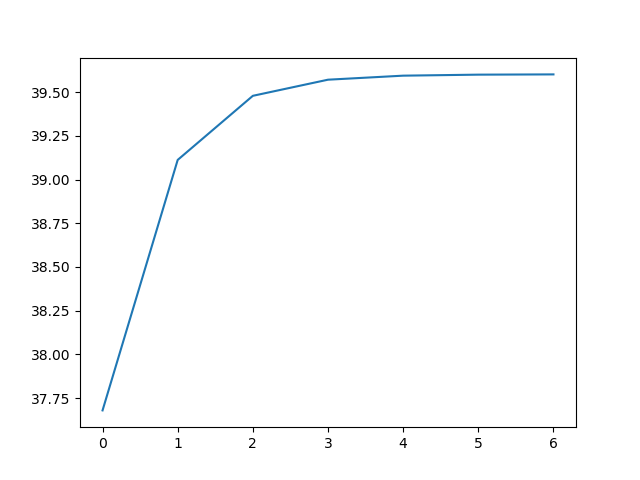

In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(lambdas)

In [37]:
def eitken_thickening(U2, U1, U0, r):
    return U2+(U2-U1)/((U1-U0)/(U2-U1)-1)

In [38]:
eitken_vals1 = [eitken_thickening(lambdas[i], lambdas[i-1], lambdas[i-2], 1/2.0) for i in range(2, len(lambdas))]
eitken_vals1

[39.6055142727821,
 39.60258288253887,
 39.60240575589416,
 39.60239477346045,
 39.60239408840764]

In [39]:
eitken_vals2 = [eitken_thickening(eitken_vals1[i], eitken_vals1[i-1], eitken_vals1[i-2],1/2) for i in range(2,len(eitken_vals1))]
eitken_vals2

[39.602394364882684, 39.60239404750166, 39.602394042833204]

In [40]:
eitken_vals3 = [ eitken_thickening(eitken_vals2[i], eitken_vals2[i-1], eitken_vals2[i-2],1/2) for i in range(2,len(eitken_vals2)) ]
eitken_vals3[0]

39.60239404276351

In [41]:
answer = [0] + [t.item(0) for t in prev_answer[:-1]] + [0]

<IPython.core.display.Javascript object>


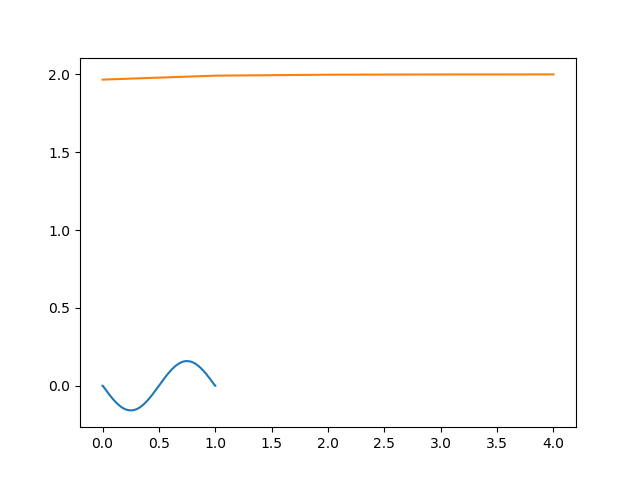

In [42]:
plt.figure()
plt.plot(np.linspace(0,1,len(answer)), answer) 

In [55]:
from math import log
def effective_p(U2,U1,U0,r):
    return log((U2-U1)/(U1-U0))/log(1/2)
def richardson_thickening(U1,U0,r,p):
    return (r**(-p)*U1-U0)/(r**(-p)-1)

<IPython.core.display.Javascript object>


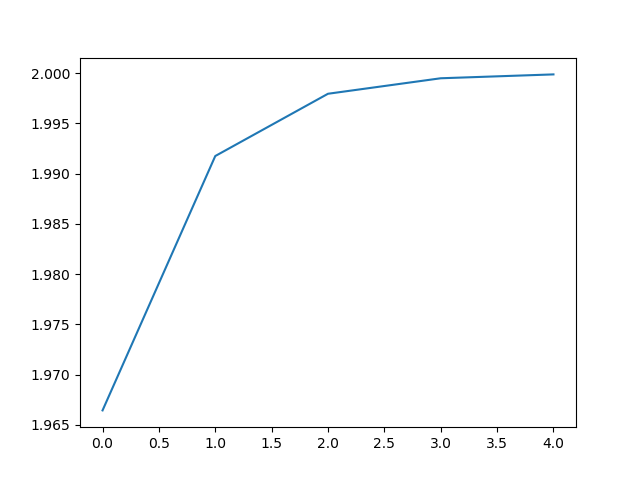

In [56]:
p_vals1 = [effective_p(lambdas[i], lambdas[i-1], lambdas[i-2], 1/2.0) for i in range(2, len(lambdas))]
plt.figure()
plt.plot(p_vals1)

In [57]:
richardson_vals1 = [richardson_thickening(lambdas[i],lambdas[i-1],1/2,2) for i in range(2,len(lambdas))]

<IPython.core.display.Javascript object>


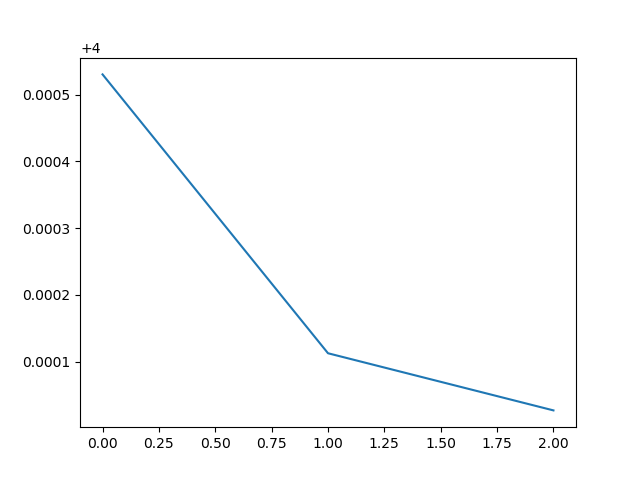

In [58]:
p_vals2 = [effective_p(richardson_vals1[i], richardson_vals1[i-1], richardson_vals1[i-2], 1/2.0) for i in range(2, len(richardson_vals1))]
richardson_vals2 = [richardson_thickening(richardson_vals1[i], richardson_vals1[i-1],1/2,4) for i in range(2,len(richardson_vals1))]
plt.figure()
plt.plot(p_vals2)

<IPython.core.display.Javascript object>


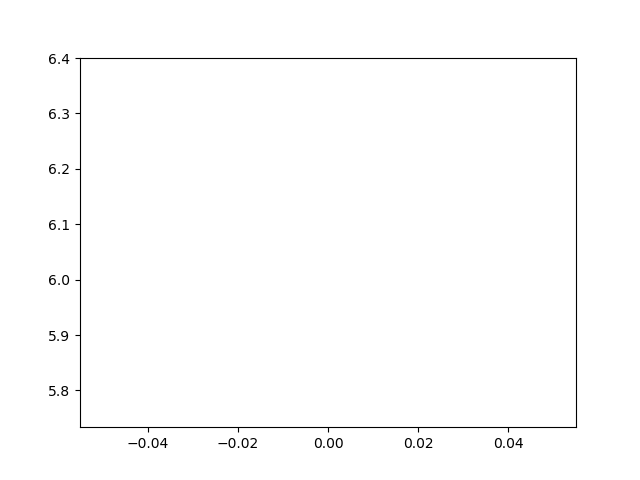

In [59]:
p_vals3 = [effective_p(richardson_vals2[i], richardson_vals2[i-1], richardson_vals2[i-2], 1/2.0) for i in range(2, len(richardson_vals2))]
richardson_vals3 = [richardson_thickening(richardson_vals2[i], richardson_vals2[i-1],1/2,6) for i in range(2,len(richardson_vals2))]
plt.figure()
plt.plot(p_vals3)

In [60]:
richardson_vals3[0]

39.602394042760196

In [ ]:
39.602394042760196